## The mission of this project is twofold: first, to gain a comprehensive understanding of the causes of brain stroke; and second, to develop predictive models that can accurately forecast the likelihood of brain stroke and identify the most significant contributing factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Understand data

In [2]:
data = pd.read_csv('brain_stroke.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Check if there's any missing dataset

In [4]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data Exploration

<AxesSubplot:>

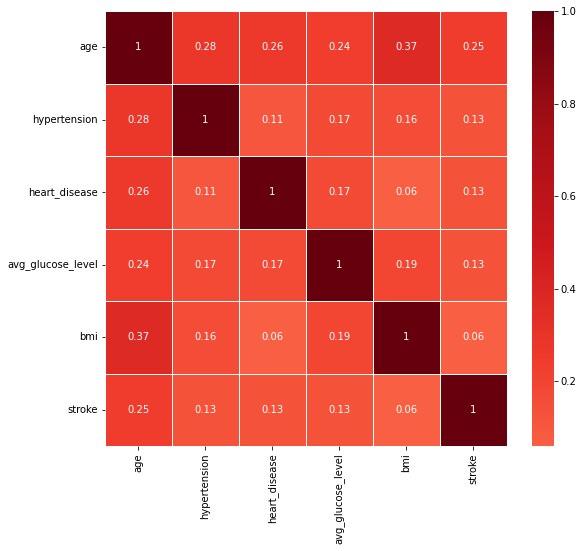

In [43]:
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(round(data.corr(),2), center=0, linewidths=0.5, cmap='Reds', annot=True)

<AxesSubplot:>

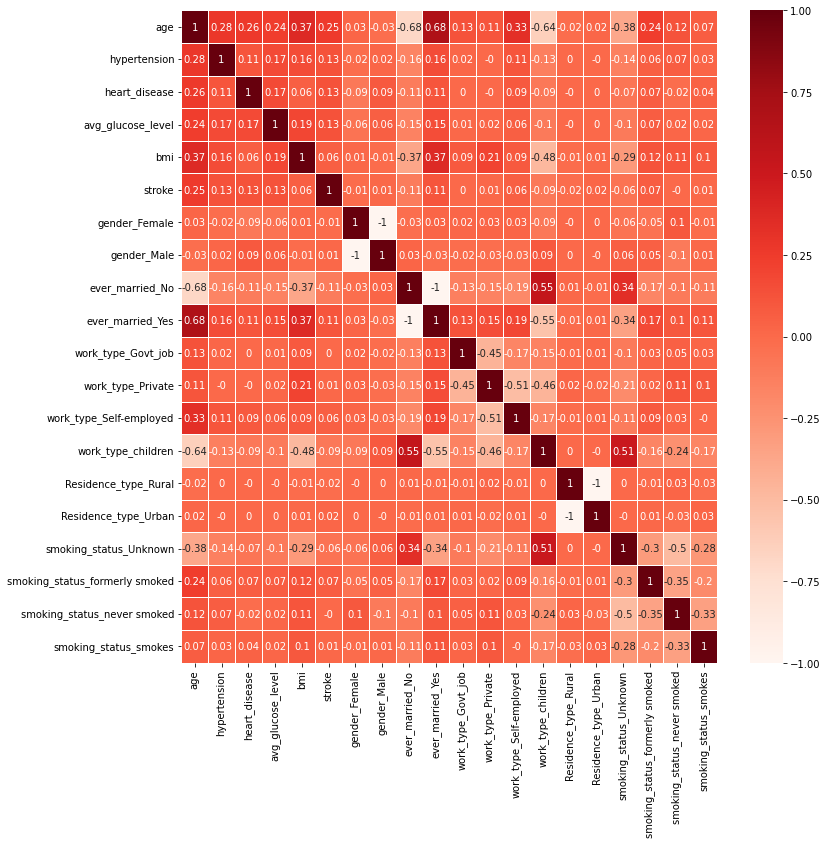

In [44]:
data_dummies = pd.get_dummies(data)
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(round(data_dummies.corr(),2), center=0, linewidths=0.5, cmap='Reds', annot=True)

## Stroke patients data visualizations

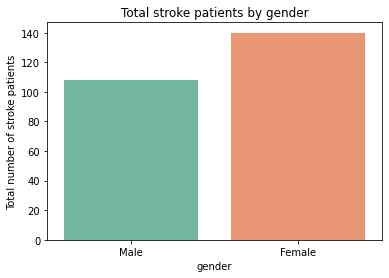

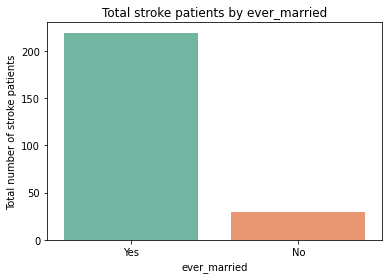

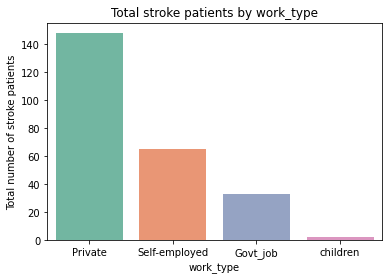

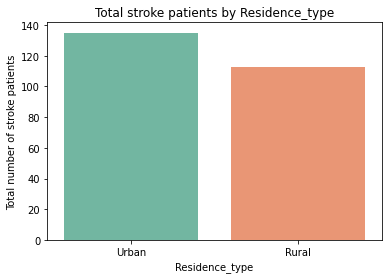

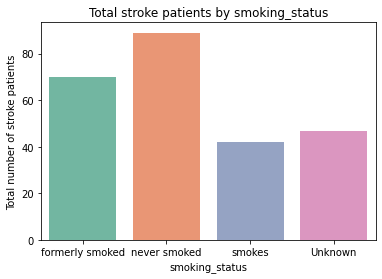

In [36]:
categorical_variables = data.select_dtypes(include= 'object').columns
stroke_patient = data[data['stroke'] == 1]

for column in categorical_variables:
  plot = sns.countplot(x=f'{column}', data=stroke_patient, palette="Set2")
  plot.set_title(f'Total stroke patients by {column}')
  plot.set_ylabel('Total number of stroke patients')
  plt.show()
  

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

TypeError: ignored

In [ ]:
vif_data.sort_values(by='VIF', ascending=False)

In [45]:
stroke_patients_dummies.corr() > 0.6 

NameError: ignored

### Chi-square test: See if some categorical variables and brain stroke are independent.

In [60]:
data_dummies = pd.get_dummies(data)

**1. Heart disease**

In [40]:
data.groupby('heart_disease')['stroke'].mean()

heart_disease
0    0.042711
1    0.170909
Name: stroke, dtype: float64

In [41]:
data['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [56]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(data.heart_disease, data.stroke, margins=True)
print(chisqt)

stroke            0    1   All
heart_disease                 
0              4505  201  4706
1               228   47   275
All            4733  248  4981


Since p-value is significantly smaller than 0.05, we can reject the Null and assume that the variables heart disease and brain stroke are not independent.

In [58]:
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[1:3])

(2.519361480046263e-20, 2)


**2. Smoking status**


The p-value for current smokers is greater than 0.05, indicating that their smoking status is not statistically significant in relation to brain stroke. However, for former smokers, the p-value is significant, suggesting that their smoking status is associated with brain stroke. **Thus, we can conclude that smoking status, particularly former smoking status, is not independent of the occurrence of brain stroke.**

In [71]:
chisqt = pd.crosstab(data_dummies['smoking_status_smokes'], data['stroke'], margins=True)
print(chisqt)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[1:3])

stroke                    0    1   All
smoking_status_smokes                 
0                      3999  206  4205
1                       734   42   776
All                    4733  248  4981
(0.8331689603066638, 2)


In [64]:
chisqt = pd.crosstab(data_dummies['smoking_status_formerly smoked'], data['stroke'], margins=True)
print(chisqt)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[1:3])

stroke                             0    1   All
smoking_status_formerly smoked                 
0                               3936  178  4114
1                                797   70   867
All                             4733  248  4981
(2.427114615558574e-05, 2)


**3. Hypertension**

In [66]:
chisqt = pd.crosstab(data_dummies['hypertension'], data['stroke'], margins=True)
print(chisqt)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[1:3])

stroke           0    1   All
hypertension                 
0             4320  182  4502
1              413   66   479
All           4733  248  4981
(1.458625970992074e-19, 2)


<AxesSubplot:title={'center':'Average glucose level'}, xlabel='Stroke', ylabel='Average glucose level'>

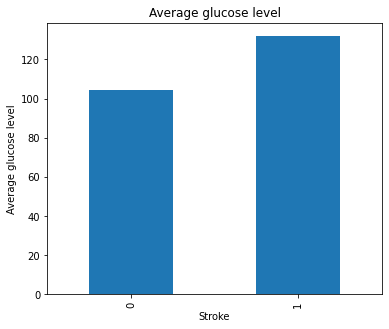

In [53]:
age_mean = data.groupby('stroke')['avg_glucose_level'].mean()

age_mean.plot(kind='bar', title='Average glucose level', ylabel='Average glucose level',
         xlabel='Stroke', figsize=(6, 5))


<AxesSubplot:title={'center':'Average age'}, xlabel='Stroke', ylabel='Average age'>

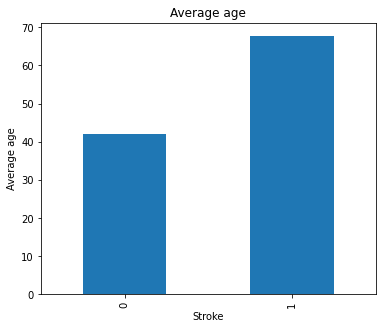

In [54]:
age_mean = data.groupby('stroke')['age'].mean()

age_mean.plot(kind='bar', title='Average age', ylabel='Average age',
         xlabel='Stroke', figsize=(6, 5))

<AxesSubplot:title={'center':'Average BMI'}, xlabel='Stroke', ylabel='Average BMI'>

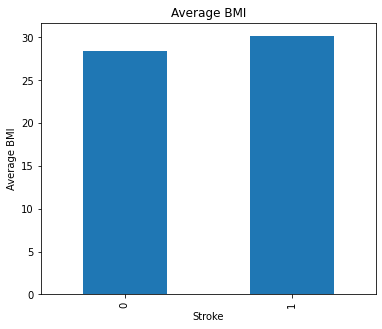

In [55]:
age_mean = data.groupby('stroke')['bmi'].mean()

age_mean.plot(kind='bar', title='Average BMI', ylabel='Average BMI',
         xlabel='Stroke', figsize=(6, 5))

## 2. Encoding

Let's observe all the categorical variables. 

In [ ]:
categorical_variables = data.select_dtypes(include= 'object').columns
categorical_variables

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [ ]:
data['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [ ]:
data['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [ ]:
data['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

About 30% of 'smoking_status' data is unknown. Since, it's a huge proportion, I will predict the missing value using Random Forest classification model. 

In [ ]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

We can observe that there are no ordinal variables. Moreover, as the variables have a low cardinality, we can employ one-hot encoding.

In [ ]:
# data_enc = pd.get_dummies(data, columns= categorical_variables)
# data_enc.head()

from sklearn import preprocessing

enc = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2}
smoking_pred = pd.get_dummies(data, columns = ['gender', 'ever_married', 'work_type', 'Residence_type'], drop_first=True)
smoking_unknown = smoking_pred[smoking_pred['smoking_status'] == 'Unknown']
smoking_notUnknown = smoking_pred[smoking_pred['smoking_status'] != 'Unknown']
smoking_notUnknown['smoking_status'] = smoking_notUnknown['smoking_status'].map(lambda x: enc[x])

X_train = smoking_notUnknown.drop(['smoking_status'], axis=1)
y_train = smoking_notUnknown['smoking_status']

#label_encoder = preprocessing.LabelEncoder()
X_pred = smoking_unknown.drop(['smoking_status'], axis=1)

X_pred

<ipython-input-32-7966fb8dd49e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_notUnknown['smoking_status'] = smoking_notUnknown['smoking_status'].map(lambda x: enc[x])


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
7,78.00,0,0,58.57,24.2,1,0,1,1,0,0,1
19,82.00,0,1,208.30,32.5,1,1,1,1,0,0,0
25,42.00,0,0,83.41,25.4,1,1,1,1,0,0,0
32,58.00,0,0,92.62,32.0,1,1,0,1,0,0,0
54,76.00,0,0,104.47,20.3,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4958,32.00,1,0,74.43,31.5,0,1,0,1,0,0,0
4962,3.00,0,0,194.75,20.1,0,1,0,0,0,1,0
4967,59.00,0,0,223.16,33.2,0,1,1,1,0,0,1
4969,70.00,0,1,65.68,28.6,0,0,1,0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_pred)

In [ ]:
np.unique(y_pred)

array([0, 1, 2])

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([1162,  226,  112]))

In [ ]:
X_pred

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
7,78.00,0,0,58.57,24.2,1,0,1,1,0,0,1
19,82.00,0,1,208.30,32.5,1,1,1,1,0,0,0
25,42.00,0,0,83.41,25.4,1,1,1,1,0,0,0
32,58.00,0,0,92.62,32.0,1,1,0,1,0,0,0
54,76.00,0,0,104.47,20.3,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4958,32.00,1,0,74.43,31.5,0,1,0,1,0,0,0
4962,3.00,0,0,194.75,20.1,0,1,0,0,0,1,0
4967,59.00,0,0,223.16,33.2,0,1,1,1,0,0,1
4969,70.00,0,1,65.68,28.6,0,0,1,0,1,0,0


In [ ]:
X_pred['smoking_status'] = y_pred

In [ ]:
data_processed = pd.concat([smoking_notUnknown, X_pred], ignore_index=True)
data_processed

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,67.00,0,1,228.69,36.6,1,1,1,1,1,0,0,1
1,80.00,0,1,105.92,32.5,0,1,1,1,1,0,0,0
2,49.00,0,0,171.23,34.4,2,1,0,1,1,0,0,1
3,79.00,1,0,174.12,24.0,0,1,0,1,0,1,0,0
4,81.00,0,0,186.21,29.0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,32.00,1,0,74.43,31.5,0,0,1,0,1,0,0,0
4977,3.00,0,0,194.75,20.1,0,0,1,0,0,0,1,0
4978,59.00,0,0,223.16,33.2,2,0,1,1,1,0,0,1
4979,70.00,0,1,65.68,28.6,0,0,0,1,0,1,0,0


# Feature Selections